In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pickle
import obspy
from scipy.signal import find_peaks
import os
import pandas as pd

In [3]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [4]:
window = 2

In [5]:
#scardec_name = os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec')[0]

In [6]:
def look_at_maximums_in_windows(window_proportion = 0.1, window = None):
    number_of_peaks_opt = []
    magnitudes_opt = []
    number_of_peaks_moy = []
    magnitudes_moy = []
    names_of_peaks = []

    time_in_window_moy = []
    height_in_window_moy = []
    proportional_height_moy = []
    time_in_window_opt = []
    height_in_window_opt = []
    proportional_height_opt = []


    for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):
        names_of_peaks.append(scardec_name)
        db = combined[combined['scardec_name']==scardec_name]
        magnitudes_opt.append(db['scardec_magnitude'].values[0])
        magnitudes_moy.append(db['scardec_magnitude'].values[0])

        time_opt = []
        momentrate_opt = []

        time_moy = []
        momentrate_moy = []

        event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
        starts = [n for n, l in enumerate(event) if l.startswith('fctopt')]
        with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
            lines = f.read().splitlines()

        lines = lines[2:]
        for line in lines:
            split = line.split(' ')
            split = [s for s in split if s not in ['', ' ', '\n']]
            time_opt.append(float(split[0]))
            momentrate_opt.append(float(split[1]))

        if window is None:
            window_opt = time_opt[-1] * window_proportion
        else:
            window_opt = window

        momentrate_window_opt = []

        for i, t in enumerate(time_opt):
            if t < window_opt:
                momentrate_window_opt.append(momentrate_opt[i])


        peaks_opt = find_peaks(momentrate_window_opt,
                        height = (None, None),
                        threshold = (None, None),
                        prominence = (None, None),
                        width = (None, None))

        starts = [n for n, l in enumerate(event) if l.startswith('fctmoy')]

        with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
            lines = f.read().splitlines()

        lines = lines[2:]
        #print(lines)
        for line in lines:
            split = line.split(' ')
            split = [s for s in split if s not in ['', ' ', '\n']]
            #print(split)
            time_moy.append(float(split[0]))
            momentrate_moy.append(float(split[1]))

        if window is None:
            window_moy = time_opt[-1] * window_proportion
        else:
            window_moy = window

        momentrate_window_moy = []
        for i, t in enumerate(time_moy):
            if t < window_moy:
                momentrate_window_moy.append(momentrate_moy[i])


        peaks_moy = find_peaks(momentrate_window_moy,
                        height = (None, None),
                        threshold = (None, None),
                        prominence = (None, None),
                        width = (None, None))

        try:
            max_peak_index = np.argmax(peaks_moy[1]['peak_heights'])
            max_height = peaks_moy[1]['peak_heights'][max_peak_index]
            max_time = time_moy[peaks_moy[0][max_peak_index]]
        except:
            max_peak_index = len(momentrate_window_moy)-1
            max_height = max(momentrate_window_moy)
            max_time = time_moy[max_peak_index]

        time_in_window_moy.append(max_time)
        height_in_window_moy.append(max_height)
        proportional_height_moy.append(max_height/np.max(momentrate_moy))

        try:
            max_peak_index = np.argmax(peaks_opt[1]['peak_heights'])
            max_height = peaks_opt[1]['peak_heights'][max_peak_index]
            max_time = time_moy[peaks_opt[0][max_peak_index]]
        except:
            max_peak_index = len(momentrate_window_opt)-1
            max_height = max(momentrate_window_opt)
            max_time = time_opt[max_peak_index]

        time_in_window_opt.append(max_time)
        height_in_window_opt.append(max_height)
        proportional_height_opt.append(max_height/np.max(momentrate_opt))

    return time_in_window_moy, height_in_window_moy, proportional_height_moy, time_in_window_opt, height_in_window_opt, proportional_height_opt, magnitudes_moy, magnitudes_opt



In [7]:
def plots_given_window_length(proportional_height_opt, proportional_height_moy, magnitudes_opt, magnitudes_moy, window):
    plt.scatter(magnitudes_opt, proportional_height_opt, label='opt', alpha = 0.5)
    plt.scatter(magnitudes_moy, proportional_height_moy, label='moy', alpha = 0.5)
    plt.ylabel(f'Proportional height of max in first {window} seconds')
    plt.xlabel('Magnitude')
    plt.legend()
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/peak_investigations/proportional_height_of_max_in_first_{window}s_vs_magnitude.png')
    plt.close()

    plt.hist(proportional_height_opt, bins = np.arange(0, 1.01, 0.05), alpha = 0.5, label='opt')
    plt.hist(proportional_height_moy, bins = np.arange(0, 1.01, 0.05), alpha = 0.5, label='moy')
    plt.xlabel(f'Proportional height of max in first {window} seconds')
    plt.ylabel('Number of events')
    plt.legend()
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/peak_investigations/proportional_height_of_max_in_first_{window}s_histogram.png')
    plt.close()

In [8]:
def plots_given_window_proportion(proportional_height_opt, proportional_height_moy, magnitudes_opt, magnitudes_moy, window_prop):
    plt.scatter(magnitudes_opt, proportional_height_opt, label='opt', alpha = 0.5)
    plt.scatter(magnitudes_moy, proportional_height_moy, label='moy', alpha = 0.5)
    plt.ylabel(f'Proportional height of max in first {window_prop:.1f} of earthquake')
    plt.xlabel('Magnitude')
    plt.legend()
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/peak_investigations/proportional_height_of_max_in_first_{window_prop:.1f}_of_eq_vs_magnitude.png')
    plt.close()

    plt.hist(proportional_height_opt, bins = np.arange(0, 1.01, 0.05), alpha = 0.5, label='opt')
    plt.hist(proportional_height_moy, bins = np.arange(0, 1.01, 0.05), alpha = 0.5, label='moy')
    plt.xlabel(f'Proportional height of max in first {window_prop:.1f} of earthquake')
    plt.ylabel('Number of events')
    plt.legend()
    plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/peak_investigations/proportional_height_of_max_in_first_{window_prop:.1f}_of_eq_histogram.png')
    plt.close()

In [9]:
# for prop in np.arange(0.1, 1.01, 0.1):
#     time_in_window_moy, height_in_window_moy, proportional_height_moy, time_in_window_opt, height_in_window_opt, proportional_height_opt, magnitudes_moy, magnitudes_opt = look_at_maximums_in_windows(window_proportion = prop)
#     plots_given_window_proportion(proportional_height_opt, proportional_height_moy, magnitudes_opt, magnitudes_moy, prop)

In [10]:
# for time in np.arange(1, 11, 1):
#     time_in_window_moy, height_in_window_moy, proportional_height_moy, time_in_window_opt, height_in_window_opt, proportional_height_opt, magnitudes_moy, magnitudes_opt = look_at_maximums_in_windows(window_proportion = None, window = time)
#     plots_given_window_length(proportional_height_opt, proportional_height_moy, magnitudes_opt, magnitudes_moy, time)

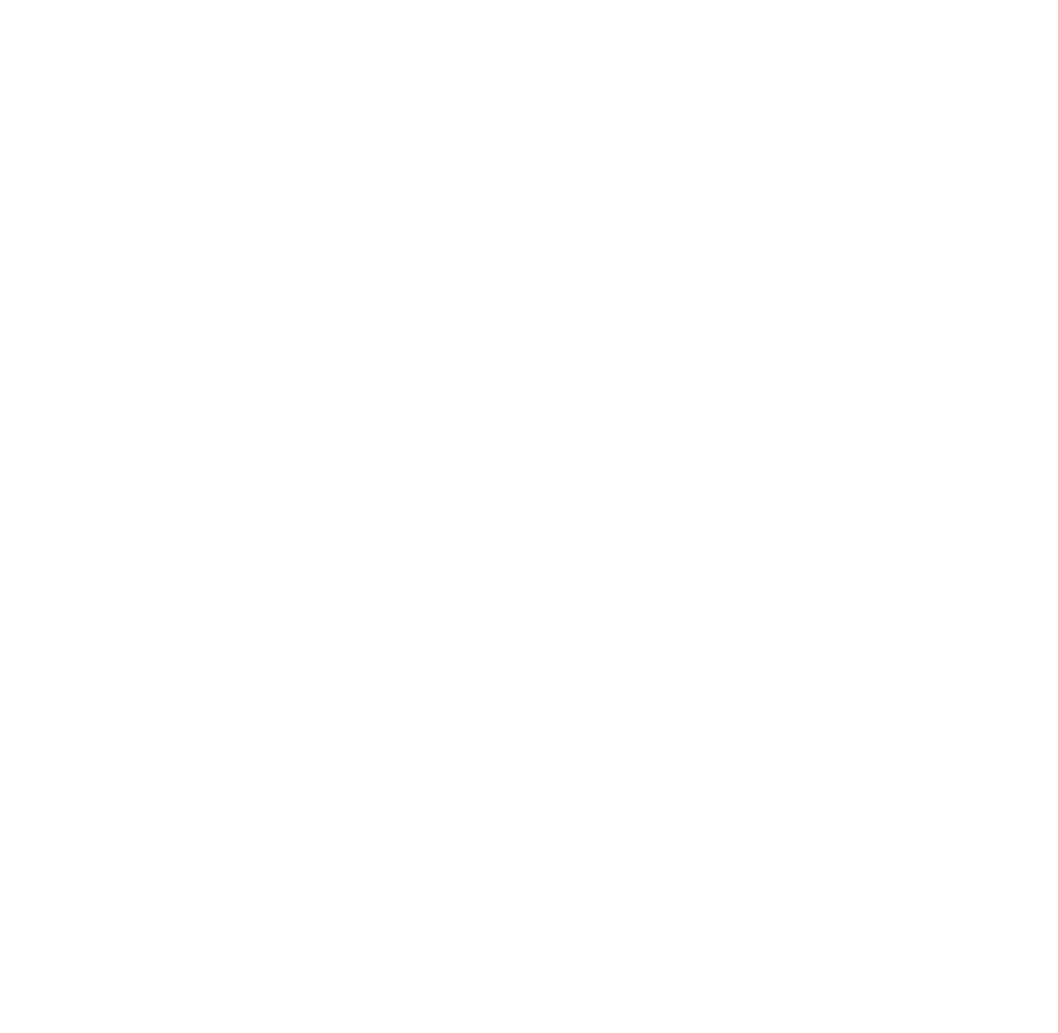

In [11]:
import seaborn as sns
sns.set_theme(style='ticks',
              context='poster',
              rc={'figure.figsize':(12,12),
                  'font.size':36})
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
time_in_window_moy, height_in_window_moy, proportional_height_moy, time_in_window_opt, height_in_window_opt, proportional_height_opt, magnitudes_moy, magnitudes_opt = look_at_maximums_in_windows(window_proportion = None, window = 1)

plt.scatter(magnitudes_moy,
            proportional_height_moy,
            label='moy',
            alpha = 0.5,
            facecolors='none',
            edgecolors='white')
plt.ylabel(f'Max in first 1s/Max overall')
plt.xlabel('Magnitude')
#plt.legend()
plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/poster/proportional_height_of_max_in_first_1s_of_eq_vs_magnitude.png', transparent=True)
plt.show()

In [12]:
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

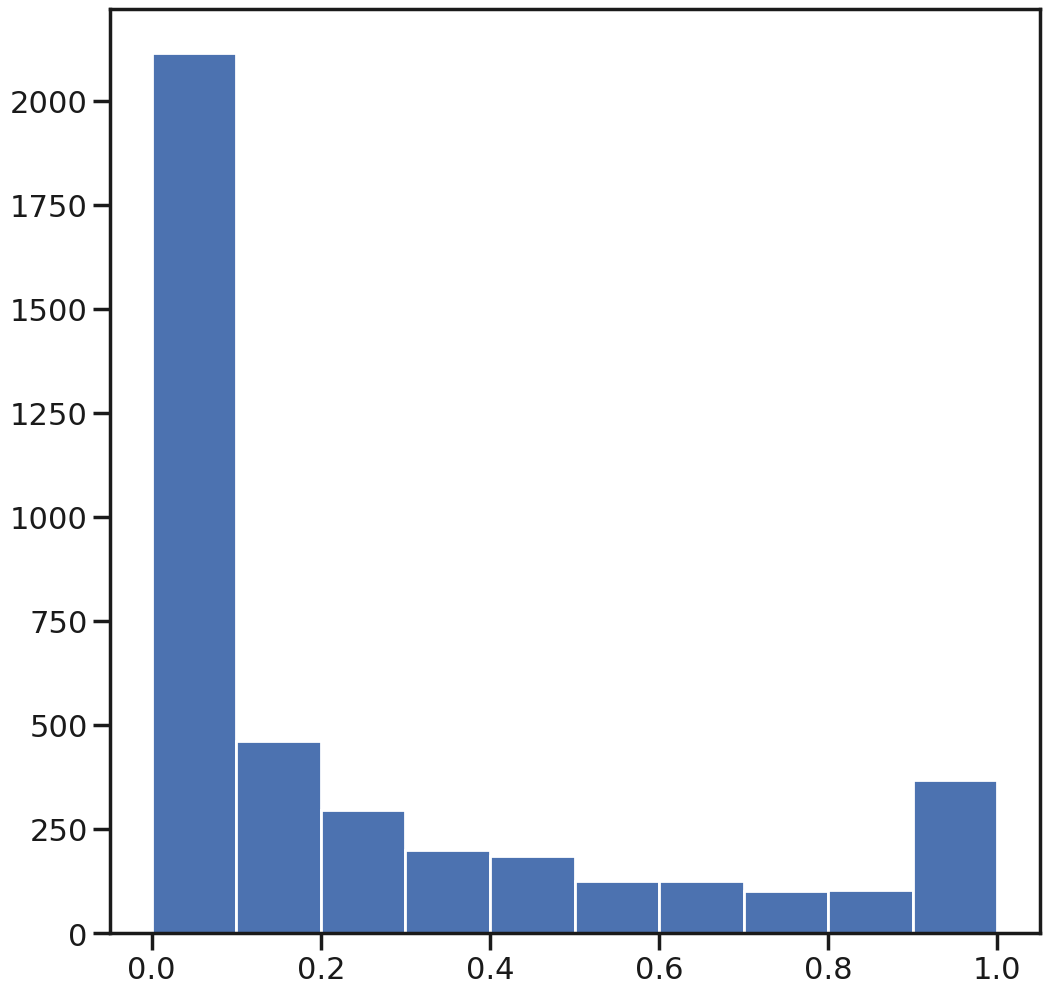

In [13]:
n, bins, _ = plt.hist(proportional_height_moy, np.arange(0, 1.1, 0.1))

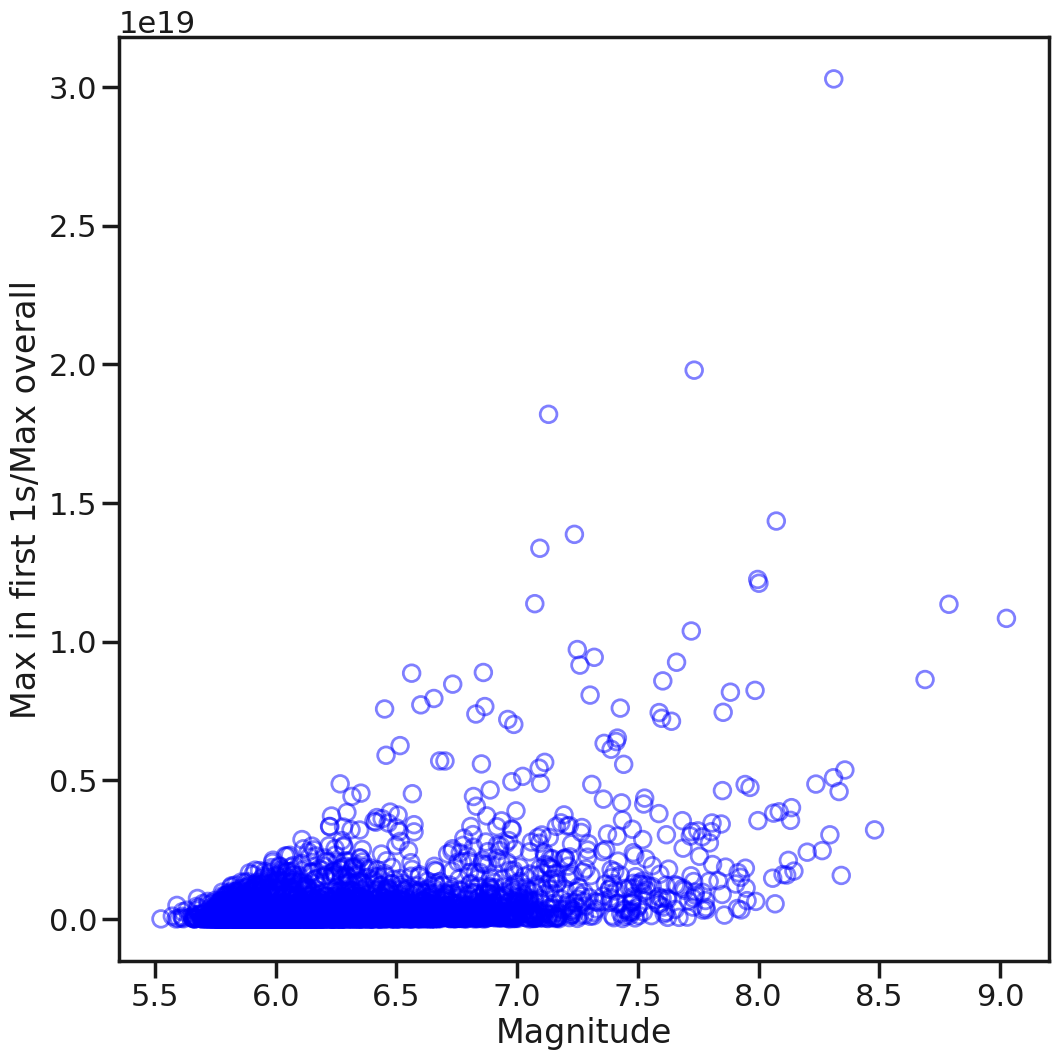

In [ ]:

time_in_window_moy, height_in_window_moy, proportional_height_moy, time_in_window_opt, height_in_window_opt, proportional_height_opt, magnitudes_moy, magnitudes_opt = look_at_maximums_in_windows(window_proportion = None, window = 1)

plt.scatter(magnitudes_moy,
            height_in_window_moy,
            label='moy',
            alpha = 0.5,
            facecolors='none',
            edgecolors='blue')
plt.ylabel(f'Max in first 1s')
plt.xlabel('Magnitude')
#plt.legend()
#plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/poster/proportional_height_of_max_in_first_1s_of_eq_vs_magnitude.png', transparent=True)
plt.show()

In [15]:
proportional_height_moy = np.array(proportional_height_moy)
magnitudes_moy = np.array(magnitudes_moy)

In [16]:
np.where(magnitudes_moy > 7.0)

(array([   7,   11,   17,   34,   40,   45,   51,   53,   54,   55,   63,
          74,   78,   88,   96,  110,  129,  132,  159,  183,  208,  212,
         220,  222,  230,  235,  258,  264,  268,  289,  299,  308,  324,
         329,  334,  343,  350,  364,  383,  389,  405,  411,  431,  456,
         463,  465,  475,  477,  478,  483,  505,  573,  578,  587,  589,
         595,  604,  618,  619,  624,  647,  654,  661,  676,  687,  689,
         691,  737,  740,  749,  751,  766,  772,  801,  802,  812,  823,
         832,  833,  861,  905,  953,  964,  975,  976,  984,  995, 1019,
        1025, 1032, 1042, 1043, 1046, 1065, 1087, 1099, 1101, 1108, 1123,
        1126, 1132, 1142, 1143, 1144, 1151, 1155, 1169, 1171, 1177, 1196,
        1214, 1230, 1242, 1243, 1262, 1265, 1273, 1292, 1294, 1297, 1304,
        1306, 1350, 1351, 1365, 1376, 1386, 1391, 1431, 1480, 1484, 1548,
        1563, 1585, 1588, 1596, 1597, 1600, 1603, 1608, 1618, 1622, 1629,
        1648, 1658, 1685, 1703, 1708, 

In [17]:
np.sort(magnitudes_moy[np.where(proportional_height_moy==1.0)[0]])

array([5.591, 5.614, 5.673, 5.676, 5.68 , 5.7  , 5.719, 5.721, 5.729,
       5.732, 5.735, 5.742, 5.744, 5.748, 5.749, 5.75 , 5.755, 5.755,
       5.762, 5.763, 5.766, 5.768, 5.77 , 5.773, 5.779, 5.78 , 5.781,
       5.781, 5.781, 5.782, 5.782, 5.784, 5.785, 5.786, 5.789, 5.79 ,
       5.791, 5.794, 5.794, 5.797, 5.798, 5.798, 5.801, 5.802, 5.805,
       5.805, 5.807, 5.807, 5.808, 5.808, 5.809, 5.812, 5.813, 5.814,
       5.816, 5.817, 5.818, 5.823, 5.823, 5.831, 5.833, 5.833, 5.833,
       5.834, 5.834, 5.835, 5.835, 5.836, 5.836, 5.841, 5.842, 5.843,
       5.846, 5.847, 5.852, 5.852, 5.853, 5.855, 5.856, 5.857, 5.859,
       5.859, 5.862, 5.866, 5.869, 5.871, 5.872, 5.874, 5.875, 5.876,
       5.878, 5.883, 5.884, 5.886, 5.889, 5.891, 5.891, 5.892, 5.892,
       5.893, 5.893, 5.894, 5.894, 5.901, 5.902, 5.902, 5.902, 5.904,
       5.906, 5.91 , 5.912, 5.913, 5.914, 5.914, 5.915, 5.916, 5.918,
       5.921, 5.921, 5.922, 5.923, 5.923, 5.925, 5.926, 5.928, 5.933,
       5.937, 5.94 ,

In [18]:
len(proportional_height_moy)

4089

In [19]:
254/4089

0.062117877231596966

In [20]:
min(magnitudes_moy)

5.525

In [21]:
max(magnitudes_moy)

9.026